# Data loading
load your data set

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
metropt3_data = pd.read_csv('metro_data_AirLeak2.csv')

# Check the ratio of balanced and imbalanced data

0    1206840
1      21000
Name: AirLeakage, dtype: int64


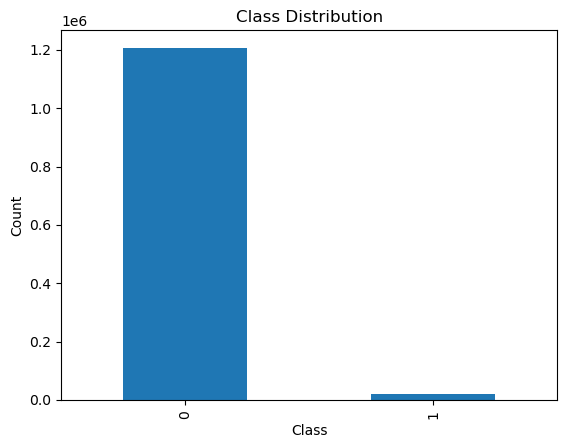

In [3]:
import matplotlib.pyplot as plt

# Assuming 'resampled_df' is your DataFrame and 'airleak' is your target variable
class_distribution = metropt3_data['AirLeakage'].value_counts()
print(class_distribution)

# Plot the distribution
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Text(0.5, 1.0, 'Distribution of Air Leak Classes')

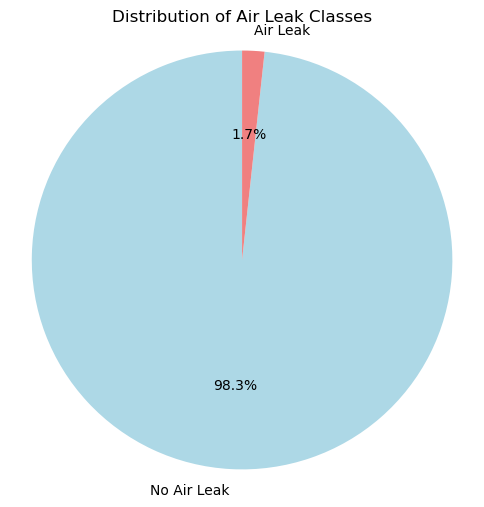

In [4]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each class in the target variable
counts = metropt3_data['AirLeakage'].value_counts()

# Data for the pie chart
labels = ['No Air Leak', 'Air Leak']
sizes = counts.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('Distribution of Air Leak Classes')

# Display the pie chart

# Data balancing

In [5]:
independent_columns = ['TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses']
dependent_column = ['AirLeakage']

X = metropt3_data[independent_columns]
y = metropt3_data[dependent_column]


In [6]:
# Step 3: Feature Selection (Example using RandomForest)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Print the shapes of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (982272, 15)
Shape of X_test: (245568, 15)
Shape of y_train: (982272, 1)
Shape of y_test: (245568, 1)


In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [9]:
X_resampled.shape,y_resampled.shape

((1930876, 15), (1930876, 1))

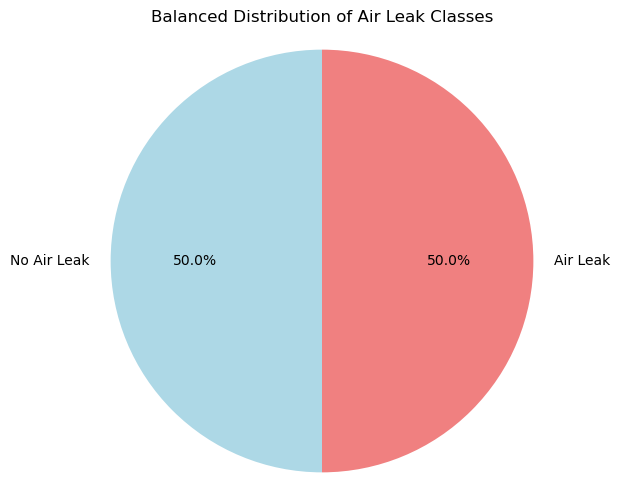

In [10]:
balanced_counts = y_resampled.value_counts()
labels = ['No Air Leak', 'Air Leak']
sizes = balanced_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.axis('equal')
plt.title('Balanced Distribution of Air Leak Classes')
plt.show()


AirLeakage
0             965438
1             965438
dtype: int64


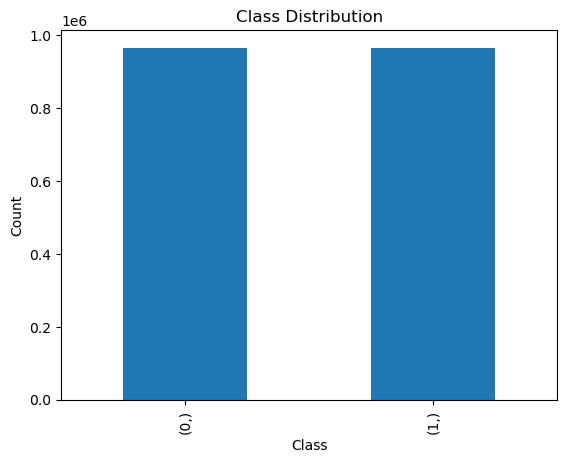

In [11]:
import matplotlib.pyplot as plt

# Assuming 'resampled_df' is your DataFrame and 'airleak' is your target variable
balanced_counts = y_resampled.value_counts()
print(balanced_counts)

# Plot the distribution
balanced_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Feature selection

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection
k = 7  # Adjust this value as needed
selector = SelectKBest(score_func=f_classif, k=k)
X_selected= selector.fit_transform(X_resampled, y_resampled)


C:\Users\trupti.gorde\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the feature names of the selected features
selected_features = X_train.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['TP2', 'H1', 'DV_pressure', 'Oil_temperature', 'COMP', 'DV_eletric',
       'MPG'],
      dtype='object')


# Visualisation

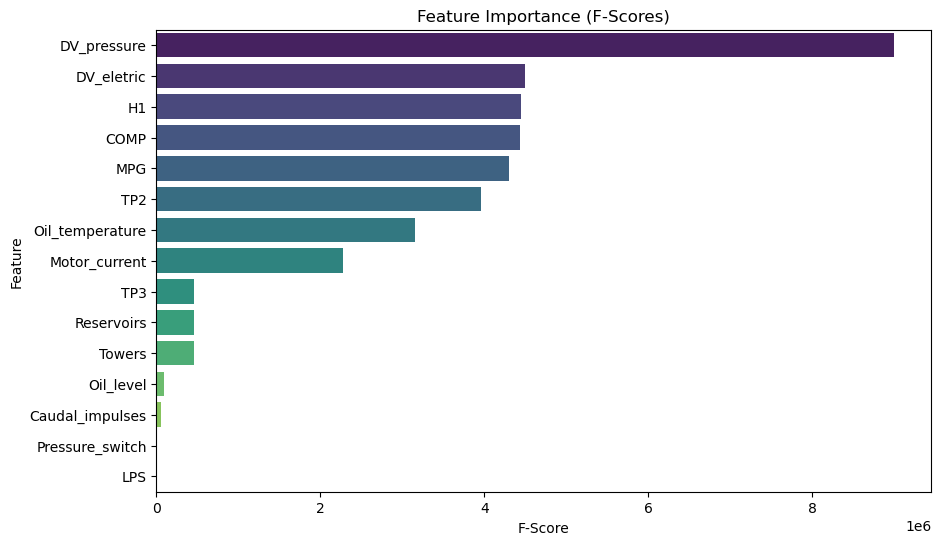

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses']

# Create a DataFrame with feature names and their F-statistic scores
feature_scores = pd.DataFrame({'Feature': features, 'F-Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='F-Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Feature Importance (F-Scores)')
plt.xlabel('F-Score')
plt.ylabel('Feature')
plt.show()

# Model Training

In [15]:
from sklearn.preprocessing import StandardScaler

# Step 4: Data preprocessing - Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [17]:
# Print the shapes of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1544700, 7)
Shape of X_test: (386176, 7)
Shape of y_train: (1544700, 1)
Shape of y_test: (386176, 1)


In [18]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6
0,0.886198,-0.847393,1.263880,0.827517,-0.845200,0.848601,-0.841416
1,0.575488,-0.847638,0.526578,0.588750,-0.845200,0.848601,-0.841416
2,-1.137719,1.040540,-0.954466,-1.116976,1.183153,-1.178411,1.188473
3,1.050234,-0.847556,1.067810,0.424036,-0.845200,0.848601,-0.841416
4,1.001156,-0.846615,1.018787,0.787637,-0.845200,0.848601,-0.841416
...,...,...,...,...,...,...,...
1544695,1.362351,-0.847638,-0.954466,-0.329296,-0.845200,0.848601,-0.841416
1544696,0.432892,-0.847509,0.526448,0.735345,-0.845200,0.848601,-0.841416
1544697,-1.137237,1.323363,-0.954466,-0.183968,1.183153,-1.178411,1.188473
1544698,1.400012,-0.848087,-0.956443,-0.701337,-0.845200,0.848601,-0.841416


In [19]:
pd.DataFrame(y_train)

,AirLeakage
1287551,1
1122043,1
464684,0
1548727,1
1859295,1
...,...
259178,0
1414414,1
131932,0
671155,0


In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Record the start time
start_time = time.time()

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the testing data
y_test_pred_xgb = xgb_model.predict(X_test)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Calculate accuracy on testing data
test_accuracy = accuracy_score(y_test, y_test_pred_xgb)

print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print("Time taken for model (seconds):", elapsed_time)


Testing Accuracy: 99.69%
Time taken for model (seconds): 16.32819366455078


In [21]:
# Predict on the training data
y_train_pred_xgb = xgb_model.predict(X_train)

# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred_xgb)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 99.71%


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate accuracy on training data
train_report = classification_report(y_train, y_train_pred_xgb)

# Calculate accuracy on testing data
test_report= classification_report(y_test, y_test_pred_xgb)

print(f"Training report: {train_report}")
print(f"Testing report: {test_report}")

# Calculate accuracy on training data
train_matrix = confusion_matrix(y_train, y_train_pred_xgb)


# Calculate accuracy on testing data
test_matrix= confusion_matrix(y_test, y_test_pred_xgb)

print(f"Training matrix: {train_matrix}")
print(f"Testing matrix: {test_matrix}")



Training report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    772622
           1       1.00      1.00      1.00    772078

    accuracy                           1.00   1544700
   macro avg       1.00      1.00      1.00   1544700
weighted avg       1.00      1.00      1.00   1544700

Testing report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    192816
           1       1.00      1.00      1.00    193360

    accuracy                           1.00    386176
   macro avg       1.00      1.00      1.00    386176
weighted avg       1.00      1.00      1.00    386176

Training matrix: [[769849   2773]
 [  1726 770352]]
Testing matrix: [[192038    778]
 [   431 192929]]


Confusion Matrix:
[[769849   2773]
 [  1726 770352]]

False Positives (FP): 2773
False Negatives (FN): 1726
Precision: 0.9964132578819725
Recall: 0.9977644745738125
F1-Score: 0.9970884084485987

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    772622
           1       1.00      1.00      1.00    772078

    accuracy                           1.00   1544700
   macro avg       1.00      1.00      1.00   1544700
weighted avg       1.00      1.00      1.00   1544700

ROC AUC Score: 1.00


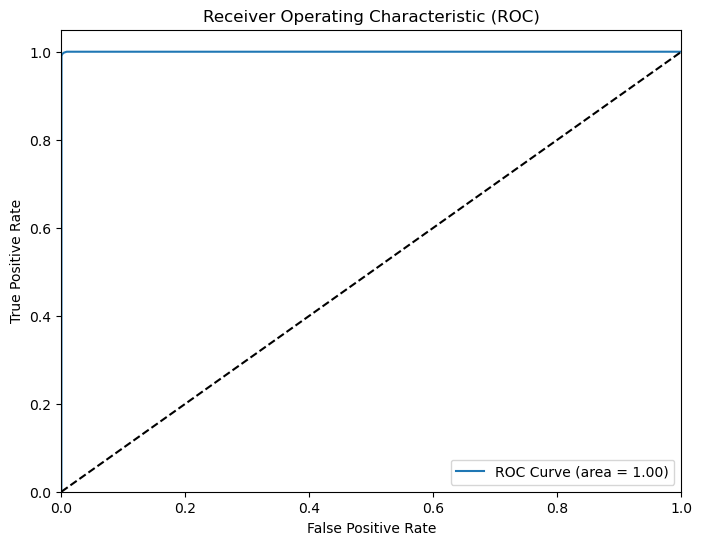

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

# Assuming you have trained your model and made predictions on the test data
# Replace y_pred with your model's predictions and y_true with the true labels
#y_pred = model.predict(X_test)  # Replace 'model' with your XGBoost or CatBoost model
y_true_train = y_train  # Replace 'y_test' with your true labels

# Calculate the confusion matrix
confusion = confusion_matrix(y_true_train, y_train_pred_xgb)

# Extract True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN)
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

# Calculate precision, recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2* (precision * recall) / (precision + recall)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("\nFalse Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Generate a classification report
report = classification_report(y_true_train, y_train_pred_xgb)
print("\nClassification Report:")
print(report)

roc_auc = roc_auc_score(y_true_train, xgb_model.predict_proba(X_train)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_true_train, xgb_model.predict_proba(X_train)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Confusion Matrix:
[[192038    778]
 [   431 192929]]

False Positives (FP): 778
False Negatives (FN): 431
Precision: 0.9959836247528484
Recall: 0.9977709971038478
F1-Score: 0.9968765097515417

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    192816
           1       1.00      1.00      1.00    193360

    accuracy                           1.00    386176
   macro avg       1.00      1.00      1.00    386176
weighted avg       1.00      1.00      1.00    386176

ROC AUC Score: 1.00


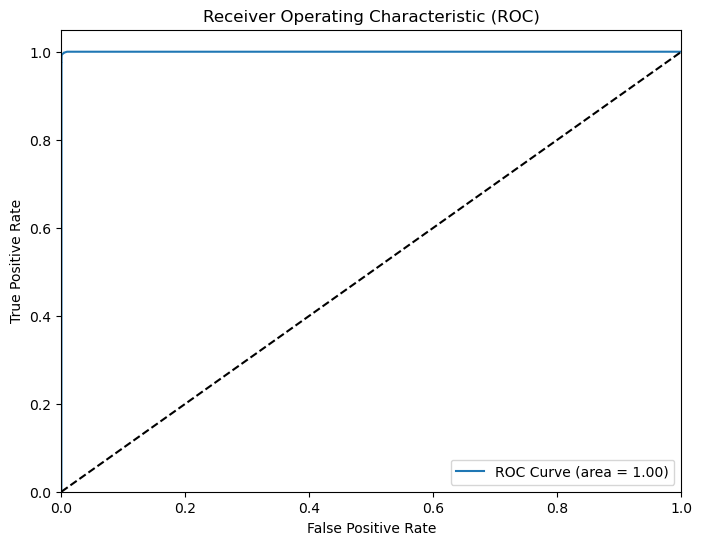

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

# Assuming you have trained your model and made predictions on the test data
# Replace y_pred with your model's predictions and y_true with the true labels
#y_pred = model.predict(X_test)  # Replace 'model' with your XGBoost or CatBoost model
y_true_test = y_test  # Replace 'y_test' with your true labels

# Calculate the confusion matrix
confusion = confusion_matrix(y_true_test, y_test_pred_xgb)

# Extract True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN)
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

# Calculate precision, recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2* (precision * recall) / (precision + recall)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("\nFalse Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Generate a classification report
report = classification_report(y_true_test, y_test_pred_xgb)
print("\nClassification Report:")
print(report)

roc_auc = roc_auc_score(y_true_test, xgb_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_true_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# model Deployment

In [25]:
import pickle

In [26]:
pickle.dump(xgb_model,open('model.pkl','wb'))

In [27]:
pickle_model=pickle.load(open('model.pkl','rb'))

In [29]:
y_train_pred_xgb=pickle_model.predict(X_train)

In [30]:
# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred_xgb)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 99.71%
